# Herramienta de igualdad: AI Fairness 360

## Introducción

En este notebook, utilizaremos la biblioteca AIF360 para medir y mitigar el sesgo en modelos de aprendizaje automático. AIF360 proporciona herramientas y algoritmos para abordar los problemas de equidad y sesgo en los datos y los modelos, lo que es fundamental en el desarrollo de IA confiable.

El sesgo en los modelos de IA puede llevar a decisiones discriminatorias y perpetuar desigualdades existentes en la sociedad. Es importante que las empresas comprendan las implicaciones éticas y sociales de sus modelos y se esfuercen por garantizar la equidad y la imparcialidad.

En este proyecto, utilizaremos el dataset "Heart Disease" de Kaggle para demostrar cómo se puede aplicar la herramienta AIF360 para mitigar el sesgo en los modelos de IA. Este dataset contiene información sobre diferentes características médicas y el objetivo es predecir la presencia de enfermedad cardíaca.

Mediante la implementación de estas herramientas y técnicas, los desarrolladores pueden mejorar la confiabilidad y la equidad de sus modelos de IA, promoviendo así la adopción responsable de la inteligencia artificial.

### 1. Instalación de AIF360

Antes de comenzar, asegúrate de instalar la biblioteca AIF360. Puedes utilizar el siguiente comando para instalarlo:

In [ ]:
!pip install aif360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Carga y preprocesado del dataset
Antes de entrenar el modelo, cargaremos el dataset de ejemplo, realizaremos una exploración inicial y dividiremos el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset

# Cargar el dataset
df = pd.read_csv('../resources/HeartDiseaseDataset.csv')

# Convertir el DataFrame en un objeto BinaryLabelDataset
dataset = BinaryLabelDataset(df=df, label_names=['target'], protected_attribute_names=['sex'])

# Dividir el dataset en conjuntos de entrenamiento y prueba
dataset_train, dataset_test = dataset.split([0.7], shuffle=True)

pip install 'aif360[LawSchoolGPA]'


### 3. Entrenamiento del modelo sin Adversarial Debiasing
Una vez tenemos los datos preparados, entrenaremos el modelo básico (sín utilizar técnicas de debiasing) utilizando el conjunto de entrenamiento.

In [ ]:
import tensorflow.compat.v1 as tf
from aif360.algorithms.inprocessing import AdversarialDebiasing

# Entrenar el modelo sin debiasing
sess = tf.Session()
tf.disable_eager_execution()
plain_model = AdversarialDebiasing(privileged_groups=[{'sex': 1}],
                                   unprivileged_groups=[{'sex': 0}],
                                   scope_name='plain_classifier',
                                   debias=False,
                                   sess=sess)
plain_model.fit(dataset_train)

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch 0; iter: 0; batch classifier loss: 18.279371
epoch 1; iter: 0; batch classifier loss: 13.467538
epoch 2; iter: 0; batch classifier loss: 11.429310
epoch 3; iter: 0; batch classifier loss: 10.424221
epoch 4; iter: 0; batch classifier loss: 6.938514
epoch 5; iter: 0; batch classifier loss: 7.509508
epoch 6; iter: 0; batch classifier loss: 6.076130
epoch 7; iter: 0; batch classifier loss: 8.947513
epoch 8; iter: 0; batch classifier loss: 6.693895
epoch 9; iter: 0; batch classifier loss: 10.270620
epoch 10; iter: 0; batch classifier loss: 10.553540
epoch 11; iter: 0; batch classifier loss: 6.937205
epoch 12; iter: 0; batch classifier loss: 7.565112
epoch 13; iter: 0; batch classifier loss: 6.707994
epoch 14; iter: 0; batch classifier loss: 5.635183
epoch 15; iter: 0; batch classifier loss: 7.327261
epoch 16; iter: 0; batch classifier loss: 6.351450
epoch 17; iter: 0; batch classifier loss: 6.177752
epoch 18; iter: 0; batch classifier loss: 7.481239
epoch 19; iter: 0; batch classifier

### 4. Análisis de sesgo
En esta sección, calcularemos diferentes métricas de sesgo en el dataset y evaluaremos la disparidad en las predicciones del modelo. Las métricas utilizadas son:

- **Diferencia en el resultado medio entre grupos no privilegiados y privilegiados**: Esta métrica mide la diferencia promedio entre los resultados de las predicciones para los grupos no privilegiados y privilegiados. Un valor cercano a 0 indica menor sesgo.

- **Disparate Impact**: Esta métrica calcula la disparidad en las tasas de predicciones entre los grupos privilegiados y no privilegiados. Un valor igual a 1 indica equidad perfecta.

- **Equal Opportunity Difference**: Esta métrica mide la diferencia en la tasa de verdaderos positivos entre los grupos privilegiados y no privilegiados. Un valor cercano a 0 indica menor sesgo en la detección de casos positivos.

- **Average Odds Difference**: Esta métrica mide la diferencia promedio en las tasas de verdaderos positivos y falsos positivos entre los grupos privilegiados y no privilegiados. Un valor cercano a 0 indica menor sesgo en la detección de casos positivos y negativos.

- **Theil Index**: Esta métrica cuantifica la desigualdad de las predicciones entre los grupos privilegiados y no privilegiados. Un valor cercano a 0 indica mayor equidad.

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

# Aplicación del modelo simple a los datos de prueba
dataset_nodebiasing_train = plain_model.predict(dataset_train)
dataset_nodebiasing_test = plain_model.predict(dataset_test)

# Calcular métricas de sesgo en el conjunto de entrenamiento
metric_nodebiasing_train = BinaryLabelDatasetMetric(dataset_nodebiasing_train, unprivileged_groups=[{'sex': 0}], privileged_groups=[{'sex': 1}])
classified_metric_nodebiasing_train = ClassificationMetric(dataset_train,
                                                 dataset_nodebiasing_train,
                                                 unprivileged_groups=[{'sex': 0}],
                                                 privileged_groups=[{'sex': 1}])

# Calcular métricas de sesgo en el conjunto de prueba
metric_nodebiasing_test = BinaryLabelDatasetMetric(dataset_nodebiasing_test, unprivileged_groups=[{'sex': 0}], privileged_groups=[{'sex': 1}])
classified_metric_nodebiasing_test = ClassificationMetric(dataset_test,
                                                 dataset_nodebiasing_test,
                                                 unprivileged_groups=[{'sex': 0}],
                                                 privileged_groups=[{'sex': 1}])

# Imprimir las métricas de sesgo
print("Métricas de sesgo en el conjunto de entrenamiento:")
print("Diferencia en el resultado medio entre grupos no privilegiados y privilegiados:", metric_nodebiasing_train.mean_difference())
print("Disparate Impact:", metric_nodebiasing_train.disparate_impact())
print("Equal Opportunity Difference:", classified_metric_nodebiasing_train.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric_nodebiasing_train.average_odds_difference())
print("Theil Index:", classified_metric_nodebiasing_train.theil_index())

print("\nMétricas de sesgo en el conjunto de prueba:")
print("Diferencia en el resultado medio entre grupos no privilegiados y privilegiados:", metric_nodebiasing_test.mean_difference())
print("Disparate Impact:", metric_nodebiasing_test.disparate_impact())
print("Equal Opportunity Difference:", classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric_nodebiasing_test.average_odds_difference())
print("Theil Index:", classified_metric_nodebiasing_test.theil_index())

Métricas de sesgo en el conjunto de entrenamiento:
Diferencia en el resultado medio entre grupos no privilegiados y privilegiados: -0.10238095238095235
Disparate Impact: 0.8506944444444445
Equal Opportunity Difference: -0.2274170274170274
Average Odds Difference: -0.2657329598506069
Theil Index: 0.14886517216430437

Métricas de sesgo en el conjunto de prueba:
Diferencia en el resultado medio entre grupos no privilegiados y privilegiados: 0.016169154228855787
Disparate Impact: 1.0285087719298247
Equal Opportunity Difference: -0.12745098039215685
Average Odds Difference: -0.09654402301461126
Theil Index: 0.16311980897399664


### 5. Mitigación del sesgo con Adversarial Debiasing
En esta sección, utilizaremos el algoritmo Adversarial Debiasing de AIF360 para mitigar el sesgo en el modelo. Entrenaremos un modelo debiased utilizando el conjunto de entrenamiento y evaluaremos su desempeño en el conjunto de prueba.

In [ ]:
# Entrenar el modelo con debiasing
sess.close()
tf.reset_default_graph()
debiased_model = AdversarialDebiasing(privileged_groups=[{'sex': 1}],
                                      unprivileged_groups=[{'sex': 0}],
                                      scope_name='debiased_classifier',
                                      debias=True,
                                      sess=tf.Session())
debiased_model.fit(dataset_train)

# Evaluar el modelo debiased en el conjunto de prueba
debiased_dataset_test = debiased_model.predict(dataset_test)

epoch 0; iter: 0; batch classifier loss: 12.585319; batch adversarial loss: 0.690643
epoch 1; iter: 0; batch classifier loss: 12.799636; batch adversarial loss: 0.703333
epoch 2; iter: 0; batch classifier loss: 10.553685; batch adversarial loss: 0.741882
epoch 3; iter: 0; batch classifier loss: 8.854447; batch adversarial loss: 0.720215
epoch 4; iter: 0; batch classifier loss: 7.110097; batch adversarial loss: 0.687153
epoch 5; iter: 0; batch classifier loss: 7.035353; batch adversarial loss: 0.726177
epoch 6; iter: 0; batch classifier loss: 5.878420; batch adversarial loss: 0.722340
epoch 7; iter: 0; batch classifier loss: 6.041943; batch adversarial loss: 0.729539
epoch 8; iter: 0; batch classifier loss: 4.673640; batch adversarial loss: 0.747878
epoch 9; iter: 0; batch classifier loss: 5.621240; batch adversarial loss: 0.795568
epoch 10; iter: 0; batch classifier loss: 5.434997; batch adversarial loss: 0.737163
epoch 11; iter: 0; batch classifier loss: 6.703222; batch adversarial lo

### 6. Evaluación del sesgo mitigado
En esta sección, calcularemos nuevamente las métricas de sesgo en el conjunto de prueba después de aplicar la mitigación.

In [ ]:
# Generar los conjuntos de datos después de la mitigación
dataset_debiasing_train = debiased_model.predict(dataset_train)
dataset_debiasing_test = debiased_model.predict(dataset_test)

# Calcular métricas de sesgo en el conjunto de entrenamiento después de la mitigación
metric_debiasing_train = BinaryLabelDatasetMetric(dataset_debiasing_train, unprivileged_groups=[{'sex': 0}], privileged_groups=[{'sex': 1}])
classified_metric_debiasing_train = ClassificationMetric(dataset_train, dataset_debiasing_train,
                                               unprivileged_groups=[{'sex': 0}],
                                               privileged_groups=[{'sex': 1}])

# Calcular métricas de sesgo en el conjunto de prueba después de la mitigación
metric_debiasing_test = BinaryLabelDatasetMetric(dataset_debiasing_test, unprivileged_groups=[{'sex': 0}], privileged_groups=[{'sex': 1}])
classified_metric_debiasing_test = ClassificationMetric(dataset_test,
                                                 dataset_debiasing_test,
                                                 unprivileged_groups=[{'sex': 0}],
                                                 privileged_groups=[{'sex': 1}])

# Imprimir las métricas de sesgo después de la mitigación
print("Métricas de sesgo en el conjunto de entrenamiento después de la mitigación:")
print("Diferencia en el resultado medio entre grupos no privilegiados y privilegiados:", metric_debiasing_train.mean_difference())
print("Disparate Impact:", metric_debiasing_train.disparate_impact())
print("Equal Opportunity Difference:", classified_metric_debiasing_train.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric_debiasing_train.average_odds_difference())
print("Theil Index:", classified_metric_debiasing_train.theil_index())

print("\nMétricas de sesgo en el conjunto de prueba después de la mitigación:")
print("Diferencia en el resultado medio entre grupos no privilegiados y privilegiados:", metric_debiasing_test.mean_difference())
print("Disparate Impact:", metric_debiasing_test.disparate_impact())
print("Equal Opportunity Difference:", classified_metric_debiasing_test.equal_opportunity_difference())
print("Average Odds Difference:", classified_metric_debiasing_test.average_odds_difference())
print("Theil Index:", classified_metric_debiasing_test.theil_index())


Métricas de sesgo en el conjunto de entrenamiento después de la mitigación:
Diferencia en el resultado medio entre grupos no privilegiados y privilegiados: -0.058730158730158744
Disparate Impact: 0.9043927648578811
Equal Opportunity Difference: -0.1821067821067821
Average Odds Difference: -0.23352856294032764
Theil Index: 0.17090288248763452

Métricas de sesgo en el conjunto de prueba después de la mitigación:
Diferencia en el resultado medio entre grupos no privilegiados y privilegiados: 0.1175373134328358
Disparate Impact: 1.2316176470588234
Equal Opportunity Difference: -0.0019607843137255943
Average Odds Difference: -0.006771897948368605
Theil Index: 0.1720430961007833


### 7. Comparación de los resultados obtenidos
Una vez calculadas todas las métricas, realizaremos una comparación de los resultados obtenidos antes y después de aplicar la mitigación del sesgo utilizando el algoritmo Adversarial Debiasing. De esta forma, podremos observar el impacto que ha tenido la herramienta.

Para ello, generaremos un gráfico que nos permita observar de forma visual los valores obtenidos para cada métrica tanto antes como después de apliar la mitigación.

Para poder interpretar los resultados correctamente, es importante recordar los valores ideales para cada métrica:

Diferencia en el resultado medio entre grupos no privilegiados y

*   Mean Difference: 0 (menor sesgo)
*   Disparate Impact: 1 (equidad perfecta)
*   Equal Opportunity Difference: 0 (igualdad de oportunidades)
*   Average Odds Difference: 0 (igualdad de oportunidades promedio)
*   Theil Index: 0 (mayor equidad)

A continuación realizaremos la comparación de los resultados obtenidos:

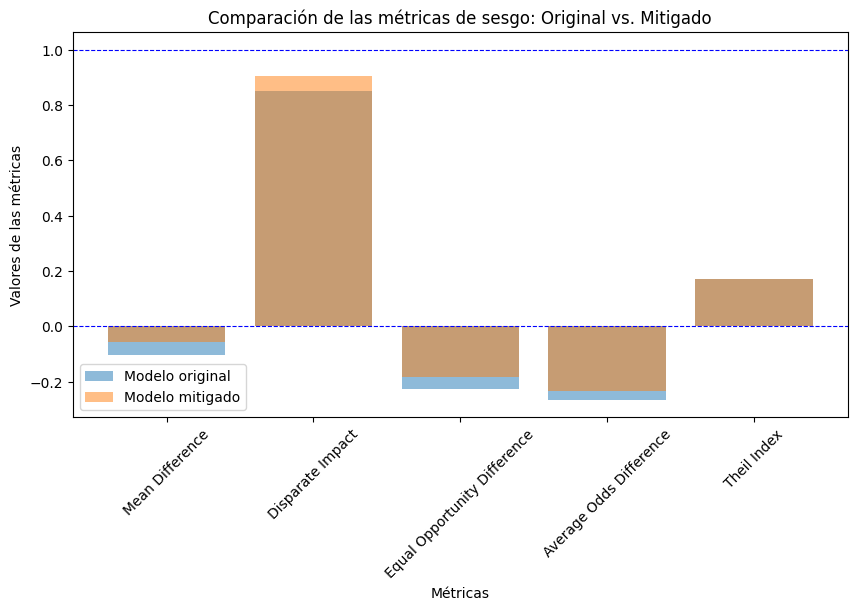

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Mean Difference', 'Disparate Impact', 'Equal Opportunity Difference', 'Average Odds Difference', 'Theil Index']

nondebiased_values = [metric_nodebiasing_train.mean_difference(),
                      metric_nodebiasing_train.disparate_impact(),
                      classified_metric_nodebiasing_train.equal_opportunity_difference(),
                      classified_metric_nodebiasing_train.average_odds_difference(),
                      classified_metric_debiasing_train.theil_index()]

debiased_values = [metric_debiasing_train.mean_difference(),
                      metric_debiasing_train.disparate_impact(),
                      classified_metric_debiasing_train.equal_opportunity_difference(),
                      classified_metric_debiasing_train.average_odds_difference(),
                      classified_metric_debiasing_train.theil_index()]

plt.figure(figsize=(10, 5))
plt.bar(metrics, nondebiased_values, label='Modelo original', alpha=0.5)
plt.bar(metrics, debiased_values, label='Modelo mitigado', alpha=0.5)

# Líneas con los valores ideales
plt.axhline(y=0, color='blue', linestyle='--', linewidth=0.8)
plt.axhline(y=1, color='blue', linestyle='--', linewidth=0.8)

plt.xlabel('Métricas')
plt.ylabel('Valores de las métricas')
plt.title('Comparación de las métricas de sesgo: Original vs. Mitigado')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 8. Conclusiones
En este notebook, hemos utilizado la herramienta AIF360 para medir y mitigar el sesgo en modelos de aprendizaje automático.

Hemos realizado un análisis inicial de sesgo en el dataset, entrenado un modelo debiased utilizando Adversarial Debiasing y evaluado las métricas de sesgo después de la mitigación. Además, gracias a la comparación de los resultados obtenidos hemos podido demostrar la utilidad de la herramienta.

AIF360 proporciona herramientas poderosas para abordar los problemas de equidad y sesgo en los modelos de aprendizaje automático.